### Nashville Traffic Stops
#### Prediction with cleaned data
This notebook will used the sample of cleaned Nashville traffic stop data to make predictions about outcomes, which can include citations, searches, arrests, and hits (i.e., successful searches). <span style="color:blue">Here we are just going to try to predict whether or not the stop resulted in a citation.</span> Citations are a reasonably common outcome for traffic stops (as oppposed to searches, which are actually pretty rare). We will use following algorithms to predict whether or not a driver was cited and see how they compare.
* k-nearest neighbors (which featured in a [project](https://github.com/data-8/materials-fa23/blob/main/project/project3/project3.ipynb) for Data 8 on classifying movies from their transcribed text
* logistic regression


Lab 14 will cover other classifiers (Support Vector Machines and Decision Tree- based models). Remember to split the data before fitting any kind of model, including standard scaler (and, later on, text featurization). You do not want to overfit by scaling or featurizing on both training and validation/test sets.

In [ ]:
# dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
# from sklearn.decomposition import PCA
import sklearn.linear_model as linear
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics

import seaborn as sns

!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import display, HTML # makes the output in Jupyter notebook pretty

# set the random seed so that results reproduce
np.random.seed(10)

In [ ]:
# load the data
path = "https://github.com/ds-modules/data/raw/main/nashville_cleaned_sample.csv"
cleaned_stops = 
...

In [ ]:
# list the columns and check the proportion of NaNs for each variable
pd.options.display.float_format = '{:.8f}'.format # use 8 decimal places and not scientific notation for float
...

In [ ]:
# what proportion of stops result in a citation?


## 1. Prepare the data for use in classification model
Citations are a much more common event than the searches we looked at in the previous lab. They still may be difficult to predict because so much of what determines whether or not a driver gets a citation depends on how the individual police officers use their discretion. We might also wonder whether different populations of drivers (e.g., Black, white) are issued citations at different rates, even without some sort of causal model for why police choose to issue traffic citations.

Before we start we need to do all the preliminary steps to prepare our data.
* select features to be used in our predictive model
* clean the data (to ensure there are no missing observations for our features)
* divide the data into training, validation, and test sets
* scale the features (to prevent the measurement scale from influencing feature importance)

### 1.a. Feature selection
We first need to decide which features in the data we should include as predictors. We can follow the procedure we used before and convert categorical features to dummy variables, create a heatmap of numeric features to see which features are associated with the outcome and with each other, decide which features we want to use, and decide how to deal with missing data for the features we want to use. We do not want to impute values for features we do not plan to use.

In [ ]:
# bivariate correlations and heatmap for feature selection; no need to be fancy

noncorrelatable = [...]
corr_df = cleaned_stops.drop(labels=noncorrelatable, axis=1)
corr_matrix = ...
plt.figure...
g = sns.heatmap(corr_matrix, annot=True)
corr_matrix

### 1.b. Data cleaning
Once we have candidate features that look like they have a reasonably strong association with 'citation_issued' to be good predictors, and are **not** outcomes that are mutually exclusive with getting a traffic citation, we can limit our subsequent work to them. We will have to remove rows that have missing values for our surviving features.

In [ ]:
corr_df.columns

In [ ]:
# select the good predictors, manage NaNs appropriately

usable_cols = ...
pred_df = corr_df[usable_cols]
pred_df['contraband_found'].fillna(value=0, inplace=True)
pred_df.info()

### 1.c. Data splitting
We can split the dataframe with the outcome and features used to predict the outcome in the same way we have done it before. Remember that we are dealing with a sample of 2000 stops here.

In [ ]:
# predicting whether citation was issued using features selected above
y = pred_df...
X = ...

# split the sampled data into training and test sets

# split the sampled training set into training and validation sets


# size of training, validation, and test sets


### 1.d. Scaling features
Before we can train a kNN classifier, we have to standardize the data (that is, express each point in terms of the mean and standard deviation of that feature), since the varying scales for each measure can affect the pairwise distances between neighbors. We will use sklearn's StandardScaler, which will turn all the features into type `float`. Like any other model fitting procedure, we should fit StandardScaler only to the training set, and then transform the validation and test sets based on the mean and standard deviation found in the training set.

In [ ]:
# fit scaler only to training data
scaler = ...


# transform all the sets based on the the scaler fit to the training data and make them into df's
# note: you can fit and transform the training set in one step in the future
X_train = pd.DataFrame...
X_validate = ...
X_test = ...

In [ ]:
X_train.head()

In [ ]:
# demonstration of how fitting to training set works
print("X_train means:", list(X_train.mean(axis=0).round(4)))
print("X_test means:", list(X_test.mean(axis=0).round(4)))

## 2. Classifying stops for citations using a k- nearest neighbors model
Here we will try to predict simply whether or not the driver got a citation using a kNN model. Those of you who took Data 8 might remember kNN classification of movies by their genre ('comedy', 'horror') using text features, or of people by whether or not they are likely to have kidney disease using risk factor predictors [K-Nearest Neighbors (k-NN)](https://inferentialthinking.com/chapters/17/1/Nearest_Neighbors.html). 

We are going to use sklearn's [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score). Note that the [sklearn algorithm](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors) expects NumPy arrays. We will use the nearest neighbor search algorithm `brute` which calculates pairwise distances between the features of each instance, as in the Data 8 movie classification example. **The distance is called the Euclidean distance, whose formula (when there are two features) is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.** You can see that calculating the pairwise distance gets much more computationally expensive the more pairs of observations are in the dataset and the more features each observation has. The number of pairwise distances increases with the square of the number of observations (but only linearly with the number of features). See the sklearn documentation for other algorithms available to do the nearest neighbors search. We are just using the one that replicates the technique from Data 8.


In [ ]:
# you cannot pass a df to any knn methods--knn wants arrays or array-like data

X_train_array = ...
X_validate_array = ...
X_test_array = ...

# construct a k-nearest neighbors prediction model for whether a search was conducted 
knn = neighbors.KNeighborsClassifier(n_neighbors=40, algorithm='brute')

# fit model to the training data


# return the mean accuracy for predictions on the training and validation data
print("Accuracy on training set: ", knn.score...


#### Baseline or "naive" prediction
If someone were to ask you "Did this randomly drawn traffic stop result in a citation," what should your answer be? Note the proportion of stops resulting in a citation up above. If you had to place a wager, you would say "no." How accurate is this baseline prediction of "no citation?"

In [ ]:
# baseline prediction of "no citation issued"


In [ ]:
# how accurate is the KNN model on the test set? 


**Question:**

How much better is the KNN model's prediction than our baseline prediction? Is there a reason you would expect it to be better?

_your answer here_



## 3. Next, try a logistic regression classifier for the same task of predicting whether a stop resulted in a citation
The following is adapted from [Data 100 Fall 2023 Lecture 22](https://ds100.org/fa23/lecture/lec22/). I am not assuming the background in linear algebra that is a pre-requisite for Data 100. Here the goal is to see how the classifer works conceptually. We already have our features and outcome scaled and ready to go for use when we use sklearn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier.

### Visualizing what logistic regression model is doing
Regression assumes that y is going to be continuous, but here we are talking about `'citation_issued'` which is dichotomous. First, let's examine a scatterplot of `'citation_issued'` on what seemed to be a not-so-good predictor, ` 'subject_age'`, which is the only continuous feature we have. It is likely that `'subject_age'`is not going to separate the outcomes very well. We will use our prediction dataframe that we made above.

In [ ]:
sns.scatterplot(data=pred_df, x= 'subject_age', y='citation_issued', hue='citation_issued', legend=None)

We can use `sns.stripplot` to jitter the $y$ values by adding a small amount of random noise to make the points easier to see.

In [ ]:
sns.stripplot(data=pred_df, x='subject_age', y='citation_issued', orient='h', order=[True,False], hue='citation_issued')

While there are linear probability models that use Ordinary Least Squares to fit a line to estimate the probability of an outcome, we typically reserve OLS for continuous outcomes since it does not do a great job of fitting the data, as we can see below. Again, we already know we should not expect much of `'subject_age'` as a predictor, but because it is continuous it is useful here for illustration purposes (while dichotomous features like `'violation_moving traffic violation'` would not work very well in a visualization).

In [ ]:
X = pred_df[['subject_age']]
Y = pred_df["citation_issued"]

least_squares_model = linear.LinearRegression()
least_squares_model.fit(X, Y)

sns.stripplot(data=pred_df, x='subject_age', y='citation_issued', orient='h', order=[True,False], hue='citation_issued')
xs = np.linspace(10, 110)
plt.plot(xs, least_squares_model.predict(xs[:, np.newaxis]), c="tab:green")


It looks like there probably is not much of an association, and like there are a couple of 'subject_age'== 100, which would distort any mean (including a regression line). Illustrating prediction will be difficult with something inherently difficult to predict, like whether or not a driver gets a citation. But let's forge ahead with this illustration.

### Logistic Regression, conceptually
Look at the following point cloud, which uses OLS to regress whether a team won the game on the difference between an NBA team's successful field goal (i.e., shots, not free throws) percentage and its opponent's field goal percentage (note that you can make a lower percentage of shots and still win).
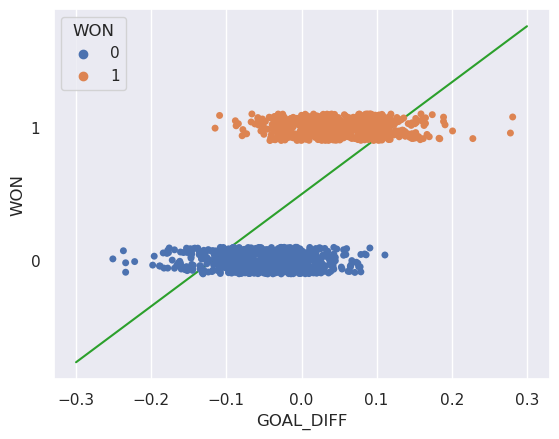
It is pretty clear that the relationship is not linear, but there is a way to use the form of a linear model to make predictions for this sort of dichotomous outcome (like `'citation_issued'`). In order to do so, we have to transform the outcome to allow us to make a prediction of whether or not $Y = 1$, that is, whether or not the outcome is true.

We do this by transforming the outcome to allow it to be linear. That means we try to predict the natural logarithm of the odds that our datapoint belongs to Class 1. The odds of an event can be represented as

$$
odds = \frac{P(Y = 1|x)}{P(Y = 0|x)} = \frac{P(Y = 1|x)}{1−P(Y = 1|x)} = \frac{p}{1−p}
$$

Making the log of the odds of an outcome what we are trying to predict, we get 

$$
log(\frac{p}{1 - p}) = \beta_0 + \beta_1x_1 + \beta_2x_2 ... +\beta_nx_n
$$

The right hand side is the familiar OLS multiple regression model. When you solve for $p$, you get

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 ... +\beta_nx_n)}}
$$

which is the sigmoid function, $\frac{1}{1 + e^-x}$.

The output is the predicted probability that the $i$-th datapoint belongs to Class 1 (for example, `'citation_issued'`==True). This means that we cannot interpret the coefficients exactly like we do in the case of OLS. The resulting sigmoid function below looks a lot like the results of binning the values of the predictor (proportional difference in basketball field goals) and getting an average value of $y$ (below, the proportion of games that were a win). We will use the ability to make a class prediction along with the probability that a data point is in that class.
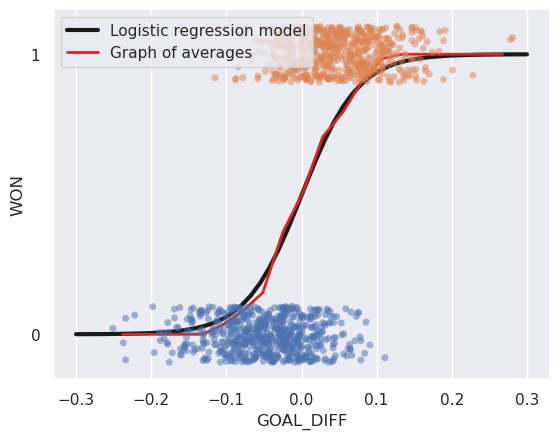

If you want to pursue the technical details of logistic regression, see [Lecture 22 from the Fa23 Data 100](https://ds100.org/fa23/lecture/lec22/) course.

### Using sklearn to make a logistic classifier
We have the citation data all prepared to use to fit a logistic classifier, using the predictive features we selected above. Remember to keep your expectations humble, since the features in the dataset probably are not enough to make a really good prediction of which driver gets a citation.

In [ ]:
# construct a logistic regression classifier model

logit_cf = linear.LogisticRegression(penalty=None, class_weight=None)

# fit the logistic regression model to the training set

# check the accuracy on the training and validation sets


#### Feature importances
We can also get the coefficients of the features in the predictive model for the logistic classifier.

In [ ]:
features = list(X_train.columns)

In [ ]:
# fetch the feature coefficients for the logit model (note that .coef_ returns a 1-dimensional array)
# zip the feature names and coefficients into a list of tuples
logistic_coeffs = ...


**Questions**

1. How accurate is the KNN classifier? How accurate is the logistic classifier? What are you comparing them to?
2. Why do you think we got the performance we did? How could you create better classifiers for traffic citations?
3. Are the feature coefficients in the logistic classifier what you expected? Say a few words about that.

_your answers here_
 

## 4. Producing a visualization of citations issued
Finally, make a table of citations by race that reports out traffic stop results by race in a table. Include at least
* the number of drivers cited, and proportion cited
* the average age of drivers 
* the number and proportion of stops for moving violations
* the number and proportion of stops for equipment violations
* anything else you think is interesting

After you have made the table, make a map of where citations were issued that differentiates the points by `'subject_race'` and gives a popup that tells the year, violation type, driver sex, and driver race. 

In [ ]:
# break down citations by race into a table that reports both numbers and proportions

citations = pd.DataFrame(data=cleaned_stops, columns=[...])

citations_by_race = citations.groupby...
table = citations_by_race.sort_values...
display(HTML(table.to_html()))

#### map the citations by race

In [ ]:
# more dependencies for mapping
import folium
import json
import os
import folium.plugins # The Folium Javascript Map Library
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium.plugins import FastMarkerCluster

In [ ]:
nashville_coords = (36.174465, -86.767960)
nashville_map =folium.Map(
    location=nashville_coords, 
    zoom_start=12, 
    tiles='https://tiles.stadiamaps.com/tiles/stamen_toner/{z}/{x}/{y}{r}.png',
    attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
    )

In [ ]:
# map just where the citations were issued not other stop outcomes

citations = ...

In [ ]:
# this is probably way inefficient; is there a better way?
color_list=[]
races = list(citations_by_race.index)
races

In [ ]:
for row in citations.itertuples():
    for race in races:
        ...
            
citations['color']=color_list  
citations.color.unique()

In [ ]:
# take the index and (lat,lon) pairs from df and map them
colors=['pink', 'red', 'green', 'purple', 'orange', 'blue']

for row in citations.itertuples(index=False):
    folium.CircleMarker(
            location=[row.lat, row.lng], 
            popup=(row.year,row.violation,row.subject_sex,row.subject_race),
            ...
nashville_map

**Question:** Can you tell me something about the traffic citation at the corner of Rosa Parks Blvd and Dominican Drive?

_your answer here_

